In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv")

# Display first 5 rows
print("Dataset Overview:")
print(df.head())

# Basic Information
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   symmetry  Fractal_Dimension  diagnosis_encoded  diagnosis_B  diagnosis_M  
0    0.2419            0.07871                  1            0            1  
1    0.1812            0.05667                  1            0            1  
2    0.2069            0.05999                  1            0            1  
3    0.2597            0.09744                  1            0            1  
4    0.1809            0.05883                  1            0            1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'

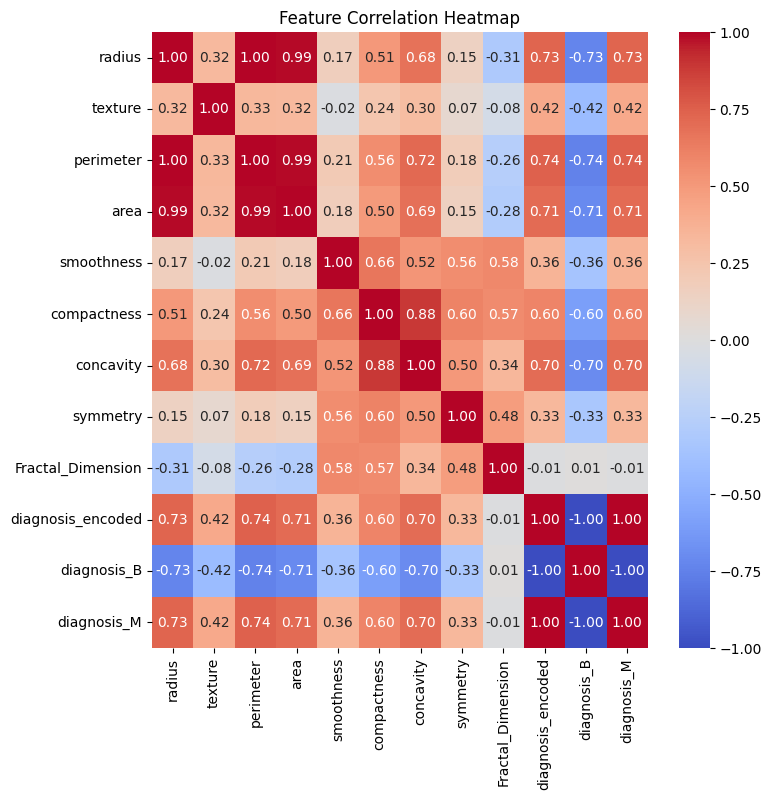

In [3]:
# Plot correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

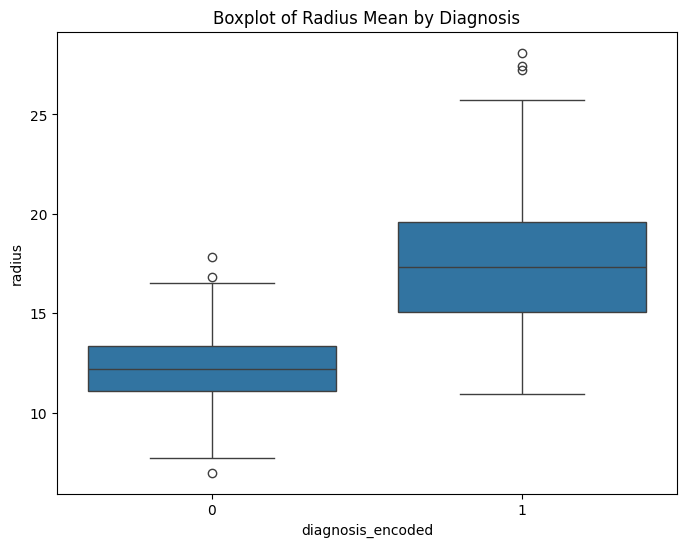

In [4]:
# Boxplot for a feature (e.g., 'radius_mean') grouped by diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='diagnosis_encoded', y='radius')  
plt.title("Boxplot of Radius Mean by Diagnosis")
plt.show()

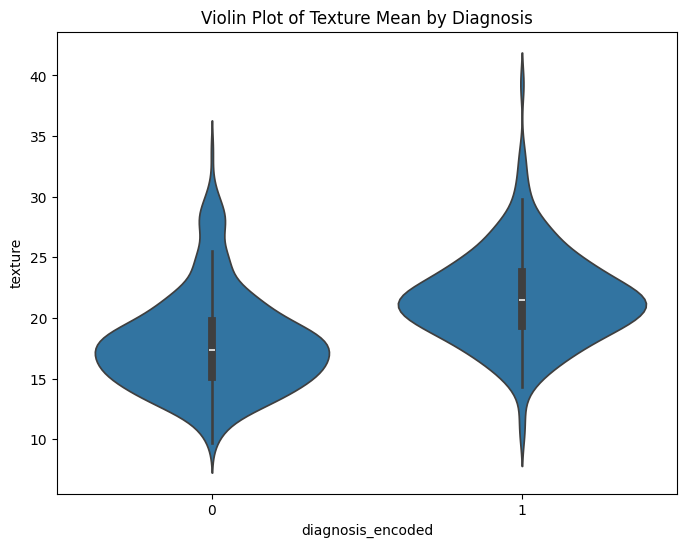

In [5]:
# Violin plot for 'texture_mean' grouped by diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='diagnosis_encoded', y='texture')  
plt.title("Violin Plot of Texture Mean by Diagnosis")
plt.show()


In [8]:
df = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_complete.csv")

In [9]:
# Verify the target column (replace 'diagnosis' or identify manually from column names)
print("Column Names:", df.columns)

# Assuming 'diagnosis' is the target column (replace if different)
target_column = 'diagnosis'

print(f"Target column is: {target_column}")
print("Unique values in the target column:", df[target_column].unique())

# Show the first rows
print("\nFirst 5 Rows:")
print(df.head())

Column Names: Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'symmetry', 'Fractal_Dimension', 'diagnosis'],
      dtype='object')
Target column is: diagnosis
Unique values in the target column: ['M' 'B']

First 5 Rows:
   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   symmetry  Fractal_Dimension diagnosis  
0    0.2419            0.07871         M  
1    0.1812            0.05667         M  
2    0.2069            0.05999         M  
3    0.2597            0.09744         M  
4    0.1809            0.05883         M  


In [10]:
# Drop rows with missing values (if any)
df = df.dropna()

# Separate Features and Target
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")


Features Shape: (569, 9)
Target Shape: (569,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully split into training and testing sets.")
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")


Data successfully split into training and testing sets.
Training Features Shape: (455, 9)
Testing Features Shape: (114, 9)


Optimal K Value: 15


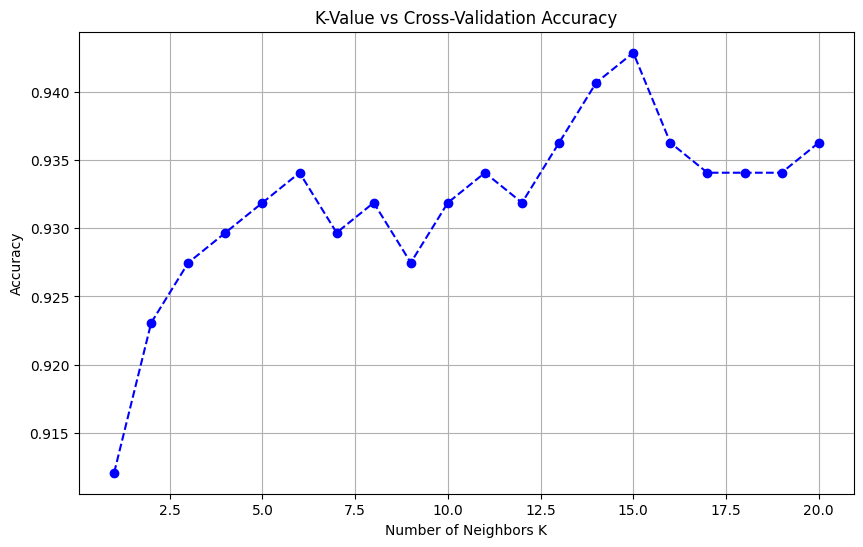

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Range of K values
k_range = range(1, 21)
cv_scores = []

# Cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Optimal K
optimal_k = k_range[cv_scores.index(max(cv_scores))]
print(f"Optimal K Value: {optimal_k}")

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='--', color='b')
plt.title('K-Value vs Cross-Validation Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [14]:
# K-Value vs Cross-Validation Accuracy Analysis and Interpretation

# 1. Accuracy Increases with K Initially:
#    For small values of K (K = 1 to K = 5), the accuracy increases steadily.
#    This is because smaller K values tend to overfit the model, capturing noise in the training data.

# 2. Optimal K Value:
#    - The optimal K value is 15.
#    - At K = 15, the model achieves the highest cross-validation accuracy (~0.943).
#    - This value represents the best balance between underfitting and overfitting.

# 3. Accuracy Fluctuates for Higher K Values:
#    - Beyond K = 15, accuracy slightly drops and stabilizes around 0.935.
#    - Larger values of K smooth the decision boundary, reducing sensitivity to individual data points.
#    - However, overly large K values can cause underfitting as they oversimplify patterns in the data.

# 4. Small K Values Lead to Overfitting:
#    - At K = 1, accuracy is lowest (~0.912), as predictions depend too heavily on a single data point.
#    - This causes the model to memorize the training data instead of generalizing.

# 5. Interpretation:
#    - K = 15 provides the best cross-validation performance, with an accuracy of approximately 94.3%.
#    - This K value should be selected as the hyperparameter for the KNN model.

# 6. Practical Implication:
#    - The final KNN model should be trained and evaluated with K = 15.
#    - Using this value ensures the model generalizes well to unseen data, balancing bias and variance.

# Summary:
# The KNN model performs best at K = 15, achieving an accuracy of ~94.3% through cross-validation.

Accuracy on Test Set: 0.9474

Confusion Matrix:
[[70  2]
 [ 4 38]]

Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



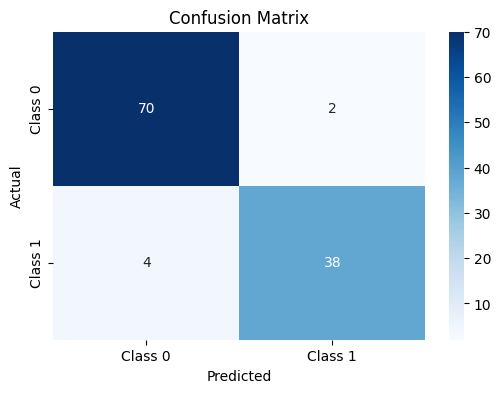

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Train the KNN model with optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Predictions
y_pred = knn_optimal.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# --- Confusion Matrix ---
# The confusion matrix helps to understand the distribution of correct and incorrect predictions:
# - True Negatives (Class 0 correctly predicted as Class 0): 70 samples.
# - False Positives (Class 0 incorrectly predicted as Class 1): 2 samples.
# - False Negatives (Class 1 incorrectly predicted as Class 0): 4 samples.
# - True Positives (Class 1 correctly predicted as Class 1): 38 samples.

# --- Analysis of Confusion Matrix ---
# - The model shows a strong ability to classify benign (Class 0) and malignant (Class 1) cases.
# - The number of false positives (2) and false negatives (4) is very low, which is ideal for medical datasets.
# - Low false negatives are especially critical since misclassifying malignant cases (Class 1) as benign (Class 0) can have severe consequences.

# --- Classification Report ---
# Precision, recall, and F1-score provide more detailed insights into the model's performance:
# - Precision for Class 0 (Benign - 'B'): 95%
#   - 95% of the samples predicted as benign (Class 0) were truly benign.
# - Precision for Class 1 (Malignant - 'M'): 95%
#   - 95% of the samples predicted as malignant (Class 1) were truly malignant.

# - Recall for Class 0 (Benign - 'B'): 97%
#   - The model correctly identified 97% of actual benign cases.
# - Recall for Class 1 (Malignant - 'M'): 90%
#   - The model correctly identified 90% of actual malignant cases.

# - F1-Score:
#   - The F1-score combines precision and recall to give a balanced measure of performance.
#   - F1-score for Class 0: 96% (strong performance for benign classification).
#   - F1-score for Class 1: 93% (strong performance for malignant classification).

# --- Key Takeaways ---
# - The model performs very well on this breast cancer dataset.
# - High accuracy, precision, and recall ensure reliable classification of both benign and malignant cases.
# - Low false negatives are particularly important since malignant cases (Class 1) require urgent attention.
# - Overall, the Gaussian Naive Bayes classifier is effective for this dataset.